In [12]:
import pandas as pd

In [13]:
import random

#PMF

## Roll one dice

In [14]:
L = []
for i in range(10000):
  L.append(random.randint(1,6))


In [15]:
len(L)

10000

In [16]:
L[:5]

[3, 5, 3, 4, 6]

In [17]:
s = (pd.Series(L).value_counts()/pd.Series(L).value_counts().sum()).sort_index()

In [18]:
s

,count
1,0.1663
2,0.1677
3,0.1672
4,0.1689
5,0.1692
6,0.1607


<Axes: >

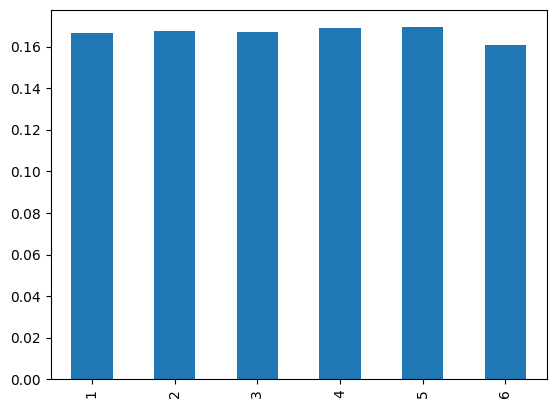

In [19]:
s.plot(kind='bar')

## Roll two dice

In [20]:
R = []
for i in range(10000):
  a = random.randint(1, 6)
  b = random.randint(1, 6)
  R.append(a+b)

In [21]:
len(R)

10000

In [22]:
p = (pd.Series(R).value_counts()/pd.Series(R).value_counts().sum()).sort_index()

In [23]:
p

,count
2,0.0280
3,0.0584
4,0.0802
5,0.1158
6,0.1354
7,0.1768
8,0.1374
9,0.1077
10,0.0805
11,0.0538


<Axes: >

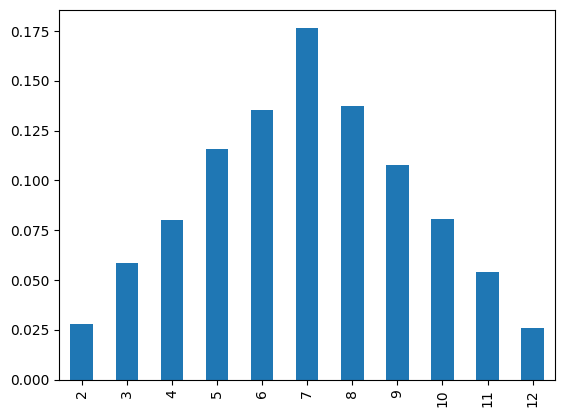

In [24]:
p.plot(kind='bar')

## CDF of PMF

In [25]:
import numpy as np
np.cumsum(s)

,count
1,0.1663
2,0.3340
3,0.5012
4,0.6701
5,0.8393
6,1.0000


<Axes: >

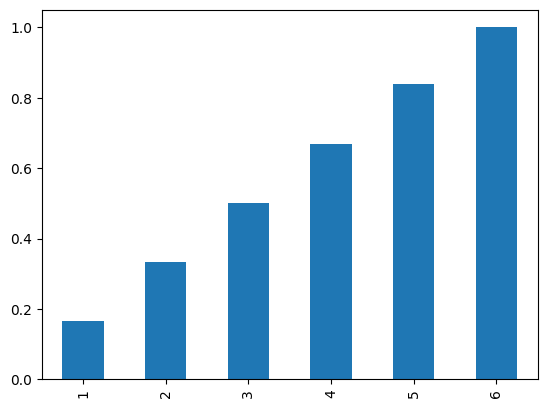

In [26]:
np.cumsum(s).plot(kind='bar')

# Parametric Density Estimation

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import normal

sample = normal(loc=50, scale=5,size=1000)

In [28]:
sample.mean()

np.float64(50.01337609944056)

(array([  5.,   9.,  19.,  44.,  71., 138., 127., 170., 171., 102.,  78.,
         43.,  20.,   2.,   1.]),
 array([34.12885805, 36.26574126, 38.40262448, 40.5395077 , 42.67639091,
        44.81327413, 46.95015735, 49.08704056, 51.22392378, 53.36080699,
        55.49769021, 57.63457343, 59.77145664, 61.90833986, 64.04522308,
        66.18210629]),
 <BarContainer object of 15 artists>)

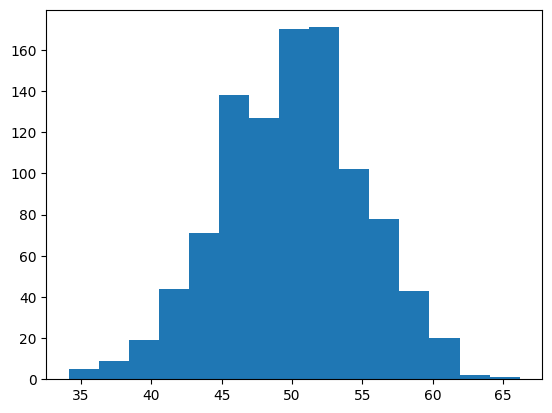

In [29]:
# plot histogram to understand the distribution of data
plt.hist(sample,bins=15)

In [30]:
# calculate sample mean and sample std dev
sample_mean = sample.mean()
sample_std = sample.std()

In [31]:
# fit the distribution with the above parameters

from scipy.stats import norm
dist = norm(sample_mean, sample_std)

In [32]:
values = np.linspace(sample.min(),sample.max(),100)

In [33]:
sample.max()

np.float64(66.1821062924815)

In [34]:
probabilities = [dist.pdf(value) for value in values]

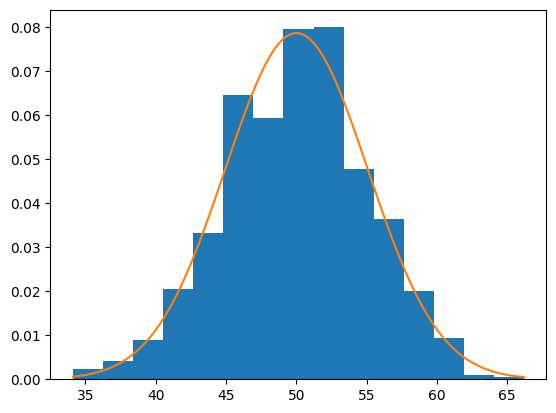

In [35]:
# plot the histogram and pdf
plt.hist(sample,bins=15,density=True)
plt.plot(values,probabilities)

/tmp/ipython-input-1482356190.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample)


<Axes: ylabel='Density'>

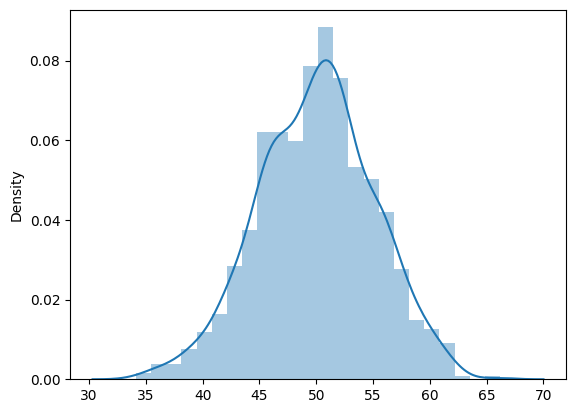

In [36]:
import seaborn as sns
sns.distplot(sample)

##Non parametric Density Estimation

# KDE

In [37]:
# generate a sample
sample1 = normal(loc=20, scale=5, size=300)
sample2 = normal(loc=40, scale=5, size=700)
sample = np.hstack((sample1, sample2))

In [38]:
sample

array([12.71974247, 10.70720515, 18.86259108, 24.06713927, 19.14726536,
       13.95455795, 19.48646342, 21.64001451, 13.15050486, 16.95852788,
       12.92419895, 26.95454012, 12.25501331, 21.39995423, 11.97739313,
       10.62310796, 20.21903737, 27.83086187, 21.42023071, 20.91068312,
       20.06620627, 15.9631763 , 19.78439081, 18.57656555, 24.74000844,
       21.00396505, 27.51659252, 28.19507988, 17.19383769, 15.6416436 ,
       11.81986728, 11.45005988, 36.68381893, 18.97597227, 14.842676  ,
       22.58957599, 19.4588818 , 27.80887168, 25.79505946, 23.02927825,
       27.27846067, 28.0881622 , 28.50341683, 16.2422424 , 10.54192848,
       11.23771052, 10.06080945, 16.06742195, 16.3012442 , 23.14289319,
       20.18385289, 11.39532827, 17.11902341, 19.43505966, 10.73355647,
       24.97744182, 11.86097694, 17.16704406, 21.41826153, 22.55169259,
       13.66817206, 20.89813866, 26.0930866 , 15.97106729, 23.73838892,
       23.53767675, 20.92546971, 20.14550791, 27.01609363, 21.59

(array([ 1.,  1.,  0.,  4.,  5.,  9.,  7.,  9., 16.,  9., 20., 22., 20.,
        22., 20., 27., 15., 20., 18., 21.,  7.,  8., 14.,  9.,  7., 13.,
        18., 18., 23., 34., 45., 42., 58., 59., 49., 54., 58., 50., 38.,
        36., 32., 20., 17., 10.,  4.,  5.,  2.,  3.,  0.,  1.]),
 array([ 5.7325107 ,  6.72425093,  7.71599116,  8.70773139,  9.69947162,
        10.69121185, 11.68295208, 12.67469231, 13.66643254, 14.65817277,
        15.649913  , 16.64165323, 17.63339346, 18.62513369, 19.61687392,
        20.60861415, 21.60035438, 22.59209461, 23.58383484, 24.57557507,
        25.5673153 , 26.55905553, 27.55079576, 28.54253599, 29.53427622,
        30.52601644, 31.51775667, 32.5094969 , 33.50123713, 34.49297736,
        35.48471759, 36.47645782, 37.46819805, 38.45993828, 39.45167851,
        40.44341874, 41.43515897, 42.4268992 , 43.41863943, 44.41037966,
        45.40211989, 46.39386012, 47.38560035, 48.37734058, 49.36908081,
        50.36082104, 51.35256127, 52.3443015 , 53.33604173,

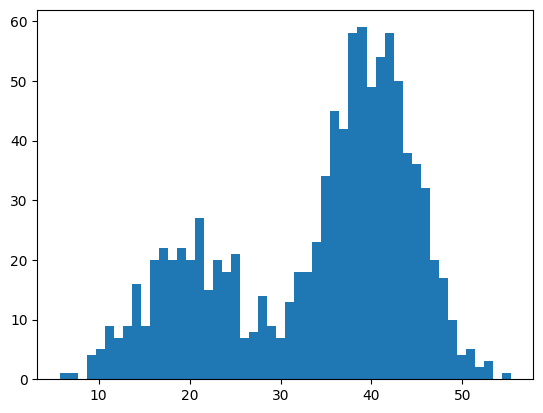

In [39]:
# plot histogram bins=50
plt.hist(sample,bins=50)

In [40]:
sample.shape

(1000,)

In [41]:
from sklearn.neighbors import KernelDensity

model = KernelDensity(bandwidth=5, kernel='gaussian')

# convert data to a 2D array
sample = sample.reshape((len(sample), 1))

model.fit(sample)

KernelDensity(bandwidth=5)

In [42]:
values = np.linspace(sample.min(),sample.max(),100)
values = values.reshape((len(values), 1))

In [43]:
probabilities = model.score_samples(values)
probabilities = np.exp(probabilities)

`score_samples(values)` returns the log-density estimate of the input samples values. This is because the `score_samples()` method of the KernelDensity class returns the logarithm of the probability density estimate rather than the actual probability density estimate.

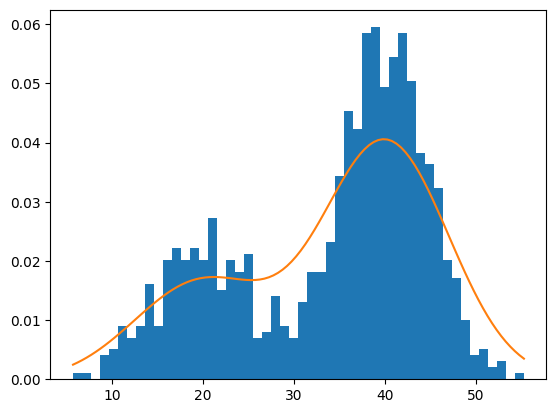

In [44]:
plt.hist(sample, bins=50, density=True)
plt.plot(values[:], probabilities)
plt.show()

<Axes: ylabel='Density'>

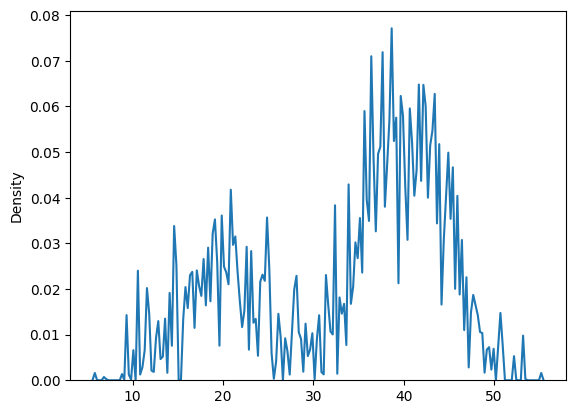

In [45]:
sns.kdeplot(sample.reshape(1000),bw_adjust=0.02)

## PDF

In [46]:
import seaborn as sns

In [47]:
df = sns.load_dataset('iris')

In [48]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Axes: xlabel='sepal_length', ylabel='Density'>

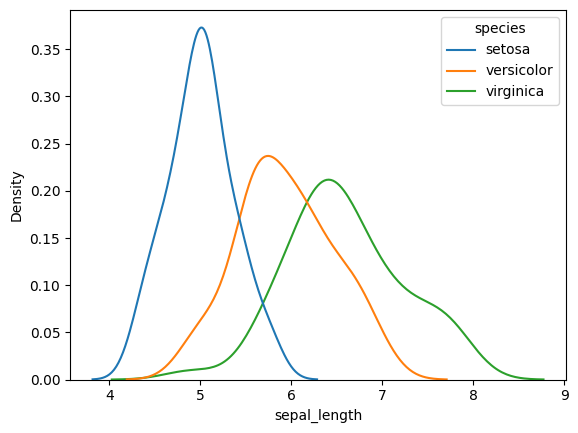

In [49]:
sns.kdeplot(data=df,x='sepal_length',hue='species')

<Axes: xlabel='sepal_width', ylabel='Density'>

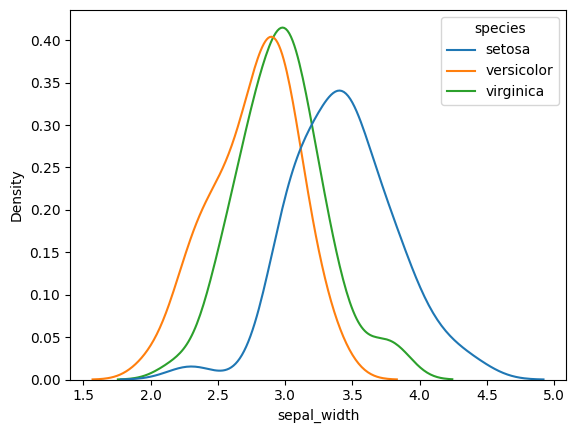

In [50]:
sns.kdeplot(data=df,x='sepal_width',hue='species')

Here above two plot, we can't specifically separate them for different catagories

<Axes: xlabel='petal_length', ylabel='Density'>

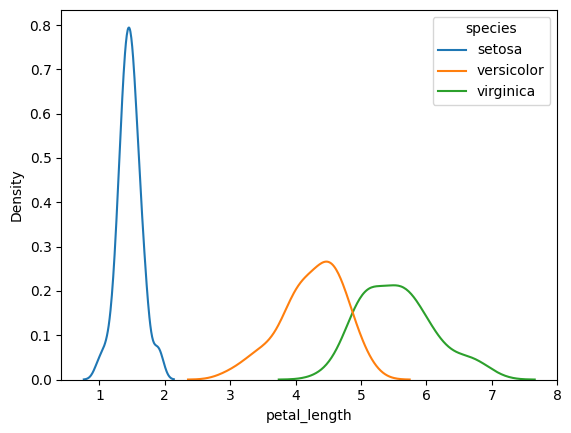

In [51]:
sns.kdeplot(data=df,x='petal_length',hue='species')

<Axes: xlabel='petal_width', ylabel='Density'>

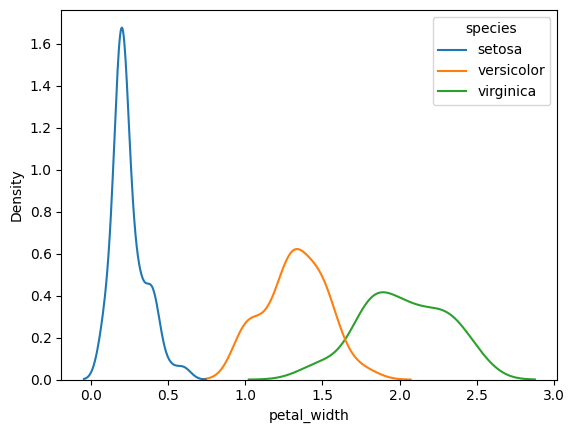

In [52]:
sns.kdeplot(data=df,x='petal_width',hue='species')

### By ploting the pdf of columns with target we can find out the which column is more important for model training

<Axes: xlabel='petal_width', ylabel='Density'>

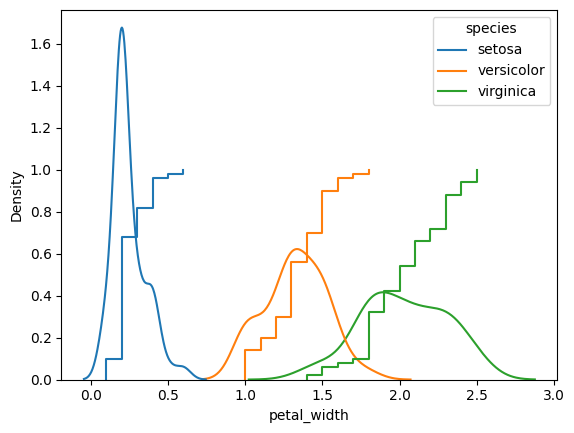

In [53]:
# KDE plot
sns.kdeplot(data=df, x='petal_width', hue='species')

# ECDF plot
sns.ecdfplot(data=df, x='petal_width', hue='species')

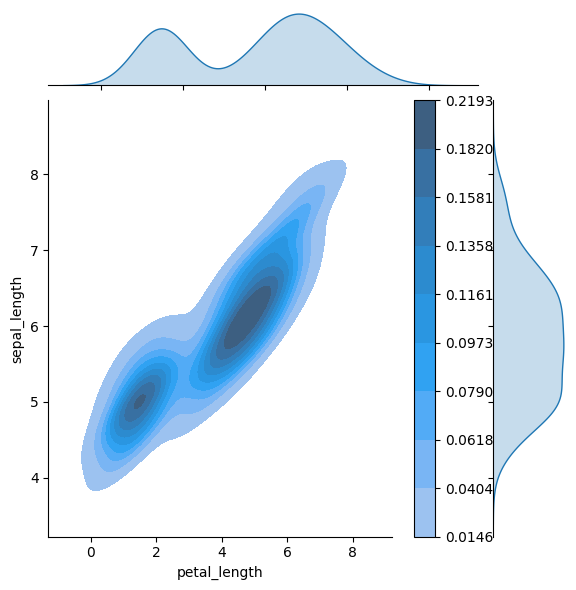

In [70]:
#2d plot
sns.jointplot(data=df, x="petal_length", y="sepal_length", kind="kde",fill=True,cbar=True)

In [54]:
titanic = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

In [55]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: xlabel='Age', ylabel='Density'>

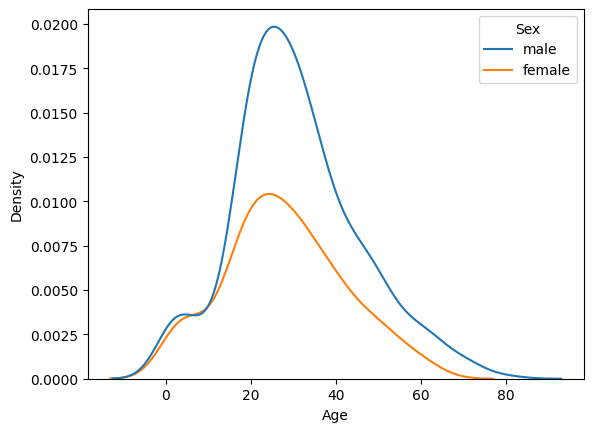

In [56]:
# code here
sns.kdeplot(data=titanic,x='Age',hue='Sex')

## Normal distribution

![PDF](https://image.slidesharecdn.com/687ee170-5515-4689-accf-2f67d0cbf082-150527083207-lva1-app6892/95/normal-distribution-6-638.jpg?cb=1432715560)

Viz tool : https://samp-suman-normal-dist-visualize-app-lkntug.streamlit.app/



<Axes: xlabel='Age', ylabel='Density'>

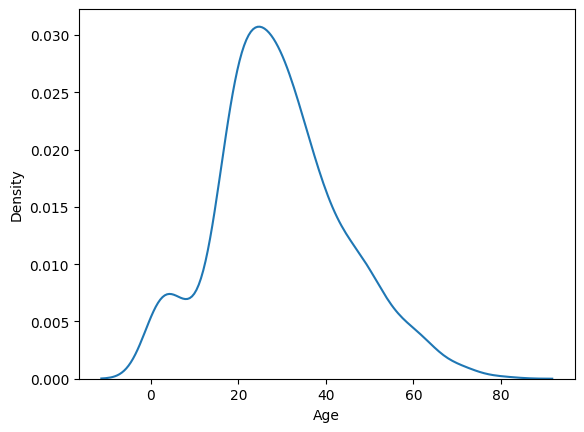

In [58]:
sns.kdeplot(titanic['Age'])

Standard Normal variate

![SNV](https://365datascience.com/resources/blog/2018-10-image4-9-1024x625.jpg)

In sepecific case if mean = 0 and std = 1 then we call this normal distribution as standard normal distribution and denote it as z.

Z TABLE : https://www.ztable.net/

In [59]:
titanic['Age'].mean()

np.float64(29.69911764705882)

In [60]:
x = (titanic['Age'] - titanic['Age'].mean())/titanic['Age'].std()

<Axes: xlabel='Age', ylabel='Density'>

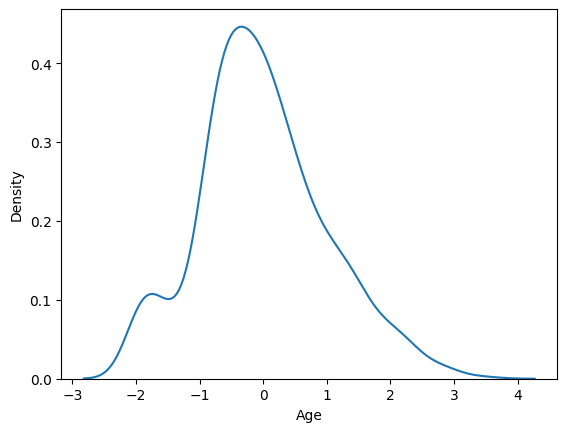

In [61]:
sns.kdeplot(x)

In [71]:
x.mean()

np.float64(2.388378943731429e-16)

In [63]:
x.std()

0.9999999999999994

##Skewness

![skewness](https://cdn.analyticsvidhya.com/wp-content/uploads/2020/06/sk1-850x321.png)

Skewness is a statistical measure that describes the asymmetry of a probability distribution or dataset around its mean.

If data is perfectly symmetrical, skewness = 0

If data is asymmetrical, skewness ≠ 0

In simple words, skewness tells us which side the data is stretched toward.

In [64]:
titanic['Age'].skew()

np.float64(0.38910778230082704)

## Finding outlier using SNV

In [65]:
titanic['Age'].mean() + 3*titanic['Age'].std()

np.float64(73.27860964406095)

In [66]:
titanic['Age'].mean() - 3*titanic['Age'].std()

np.float64(-13.88037434994331)

In [67]:
titanic[titanic['Age'] > 73]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.000,A23,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.775,NaN,S
